In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
a = pd.read_excel('[MASA Hackathon 2022]TravelInsuranceDataSet.xlsx')

In [4]:
print(a.head())

  Agency    Agency Type Distribution Channel                     Product Name  \
0    CBH  Travel Agency              Offline               Comprehensive Plan   
1    CBH  Travel Agency              Offline               Comprehensive Plan   
2    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
3    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
4    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   

  Claim  Duration Destination  Net Sales  Commision (in value) Gender  Age  
0    No       186    MALAYSIA      -29.0                  9.57      F   81  
1    No       186    MALAYSIA      -29.0                  9.57      F   71  
2    No        65   AUSTRALIA      -49.5                 29.70    NaN   32  
3    No        60   AUSTRALIA      -39.6                 23.76    NaN   32  
4    No        79       ITALY      -19.8                 11.88    NaN   41  


In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [6]:
updated_a = a
updated_a['Gender']=updated_a['Gender'].fillna('Prefer not to say')
updated_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                63326 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [7]:
print(updated_a.head())

  Agency    Agency Type Distribution Channel                     Product Name  \
0    CBH  Travel Agency              Offline               Comprehensive Plan   
1    CBH  Travel Agency              Offline               Comprehensive Plan   
2    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
3    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
4    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   

  Claim  Duration Destination  Net Sales  Commision (in value)  \
0    No       186    MALAYSIA      -29.0                  9.57   
1    No       186    MALAYSIA      -29.0                  9.57   
2    No        65   AUSTRALIA      -49.5                 29.70   
3    No        60   AUSTRALIA      -39.6                 23.76   
4    No        79       ITALY      -19.8                 11.88   

              Gender  Age  
0                  F   81  
1                  F   71  
2  Prefer not to say   32  
3  P

In [8]:
updated_a.to_excel(r'C:\Users\Asus\abc2.xlsx', index = False)

In [9]:
import matplotlib.pyplot as plt
 
# Load the dataset
b = pd.read_excel('abc2.xlsx')
 
# Create the dataframe
c = pd.DataFrame(b)

c.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,Prefer not to say,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,Prefer not to say,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,Prefer not to say,41


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

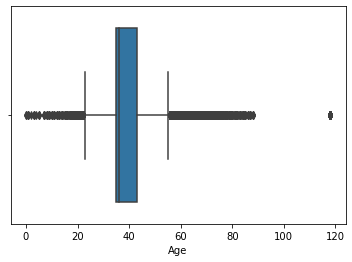

In [10]:
# Box Plot
import seaborn as sns
sns.boxplot(c['Age'])


In [11]:
# Position of the Outlier
print(np.where((c['Age']>60) & (c['Age']<20)))

(array([], dtype=int64),)


In [12]:
from scipy import stats
zsAge = np.abs(stats.zscore(c['Age']))
print(zsAge)

0        2.927182
1        2.213758
2        0.568598
3        0.568598
4        0.073484
           ...   
63321    0.639940
63322    0.002142
63323    1.214963
63324    1.643018
63325    0.354571
Name: Age, Length: 63326, dtype: float64


In [13]:
threshold = 3
 
# Position of the outlier
print(np.where(zsAge > 3))

(array([   10,   105,   220, ..., 63096, 63182, 63183], dtype=int64),)


In [14]:
# IQRAge
Q3Age = np.percentile(c['Age'], 75,
                      interpolation = 'midpoint')
Q1Age = np.percentile(c['Age'], 25,
                      interpolation = 'midpoint')
IQRAge = Q3Age - Q1Age
print("IQR for age: ",IQRAge)

IQR for age:  8.0


In [15]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                63326 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration'>

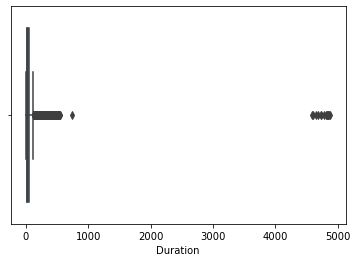

In [16]:
sns.boxplot(c['Duration'])

In [17]:
# Position of the Outlier
print(np.where(c['Duration']>4000))

(array([ 3025,  6847,  8686,  9232, 12059, 12438, 15281, 21916, 30437,
       30826, 39842, 41391, 49722, 55326], dtype=int64),)


In [18]:
zsDuration = np.abs(stats.zscore(c['Duration']))
print(zsDuration)

0        1.342783
1        1.342783
2        0.154070
3        0.104950
4        0.291607
           ...   
63321    0.605978
63322    0.085302
63323    0.464846
63324    0.455022
63325    0.268365
Name: Duration, Length: 63326, dtype: float64


In [19]:
# Position of the outlier
print(np.where(zsDuration > 3))

(array([   25,   251,   252, ..., 63232, 63233, 63234], dtype=int64),)


In [20]:
# IQRDuration
Q3Duration = np.percentile(c['Duration'], 75,
                      interpolation = 'midpoint')
Q1Duration = np.percentile(c['Duration'], 25,
                      interpolation = 'midpoint')
IQRDuration = Q3Duration - Q1Duration
print("IQR for duration: ",IQRDuration)

IQR for duration:  44.0


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Net Sales'>

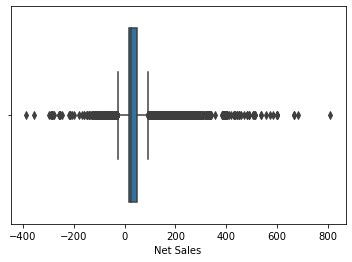

In [21]:
sns.boxplot(c['Net Sales'])

In [22]:
# Position of the Outlier
print(np.where((c['Net Sales']>200) & (c['Net Sales']<-200)))

(array([], dtype=int64),)


In [23]:
zsNetSales = np.abs(stats.zscore(c['Net Sales']))
print(zsNetSales)

0        1.426997
1        1.426997
2        1.846690
3        1.644009
4        1.238647
           ...   
63321    0.116736
63322    0.014372
63323    0.464774
63324    0.464774
63325    0.300992
Name: Net Sales, Length: 63326, dtype: float64


In [24]:
# Position of the outlier
print(np.where(zsNetSales > 3))

(array([    5,     7,    12, ..., 63232, 63233, 63234], dtype=int64),)


In [25]:
# IQRNetSales
Q3NetSales = np.percentile(c['Net Sales'], 75,
                      interpolation = 'midpoint')
Q1NetSales = np.percentile(c['Net Sales'], 25,
                      interpolation = 'midpoint')
IQRNetSales = Q3NetSales - Q1NetSales
print("IQR for net sales: ",IQRNetSales)

IQR for net sales:  30.0


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Commision (in value)'>

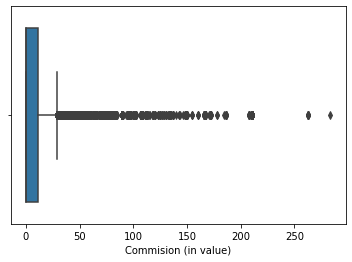

In [26]:
sns.boxplot(c['Commision (in value)'])

In [27]:
# Position of the Outlier
print(np.where(c['Commision (in value)']>50))

(array([    7,     9,    20, ..., 63234, 63239, 63240], dtype=int64),)


In [28]:
zsCommision = np.abs(stats.zscore(c['Commision (in value)']))
print(zsCommision)

0        0.012118
1        0.012118
2        1.004331
3        0.704395
4        0.104524
           ...   
63321    0.123206
63322    0.211571
63323    0.177234
63324    0.177234
63325    0.035851
Name: Commision (in value), Length: 63326, dtype: float64


In [29]:
# Position of the outlier
print(np.where(zsCommision > 3))

(array([   24,    25,   130, ..., 63233, 63234, 63240], dtype=int64),)


In [30]:
# IQRCommision
Q3Commision = np.percentile(c['Commision (in value)'], 75,
                      interpolation = 'midpoint')
Q1Commision = np.percentile(c['Commision (in value)'], 25,
                      interpolation = 'midpoint')
IQRCommision = Q3Commision - Q1Commision
print("IQR for Commision: ",IQRCommision)

IQR for Commision:  11.55


In [31]:
# Upper bound
upperAge = np.where(c['Age'] >= (Q3Age+1.5*IQRAge))
# Lower bound
lowerAge = np.where(c['Age'] <= (Q1Age-1.5*IQRAge))
 



In [32]:
''' Removing the Outliers '''
c.drop(upperAge[0], inplace = True)
c.drop(lowerAge[0], inplace = True)
c.info()
c.to_excel(r'C:\Users\Asus\abc3.xlsx', index = False)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 54885 entries, 2 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                54885 non-null  object 
 1   Agency Type           54885 non-null  object 
 2   Distribution Channel  54885 non-null  object 
 3   Product Name          54885 non-null  object 
 4   Claim                 54885 non-null  object 
 5   Duration              54885 non-null  int64  
 6   Destination           54885 non-null  object 
 7   Net Sales             54885 non-null  float64
 8   Commision (in value)  54885 non-null  float64
 9   Gender                54885 non-null  object 
 10  Age                   54885 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.0+ MB


In [33]:
# Load the dataset
d = pd.read_excel('abc3.xlsx')
 
# Create the dataframe
e = pd.DataFrame(d)
# Upper bound
upperDuration = np.where(e['Duration'] >= (Q3Duration+1.5*IQRDuration))
# Lower bound
lowerDuration = np.where(e['Duration'] <= (Q1Duration-1.5*IQRDuration))
 
e.drop(upperDuration[0], inplace = True)
e.drop(lowerDuration[0], inplace = True)
e.info()
e.to_excel(r'C:\Users\Asus\abc4.xlsx', index = False)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 50076 entries, 0 to 54884
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                50076 non-null  object 
 1   Agency Type           50076 non-null  object 
 2   Distribution Channel  50076 non-null  object 
 3   Product Name          50076 non-null  object 
 4   Claim                 50076 non-null  object 
 5   Duration              50076 non-null  int64  
 6   Destination           50076 non-null  object 
 7   Net Sales             50076 non-null  float64
 8   Commision (in value)  50076 non-null  float64
 9   Gender                50076 non-null  object 
 10  Age                   50076 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 4.6+ MB


In [34]:
# Load the dataset
f = pd.read_excel('abc4.xlsx')
 
# Create the dataframe
g = pd.DataFrame(f)
# Upper bound
upperNetSales = np.where(g['Net Sales'] >= (Q3NetSales+1.5*IQRNetSales))
# Lower bound
lowerNetSales = np.where(g['Net Sales'] <= (Q1NetSales-1.5*IQRNetSales))
g.drop(upperNetSales[0], inplace = True)
g.drop(lowerNetSales[0], inplace = True)

g.info()
g.to_excel(r'C:\Users\Asus\abc5.xlsx', index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47396 entries, 2 to 50075
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                47396 non-null  object 
 1   Agency Type           47396 non-null  object 
 2   Distribution Channel  47396 non-null  object 
 3   Product Name          47396 non-null  object 
 4   Claim                 47396 non-null  object 
 5   Duration              47396 non-null  int64  
 6   Destination           47396 non-null  object 
 7   Net Sales             47396 non-null  float64
 8   Commision (in value)  47396 non-null  float64
 9   Gender                47396 non-null  object 
 10  Age                   47396 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 4.3+ MB


In [35]:


# Load the dataset
h = pd.read_excel('abc4.xlsx')
 
# Create the dataframe
i = pd.DataFrame(f)
# Upper bound
upperCommision = np.where(i['Commision (in value)'] >= (Q3Commision+1.5*IQRCommision))
# Lower bound
lowerCommision = np.where(i['Commision (in value)'] <= (Q1Commision-1.5*IQRCommision))
i.drop(upperCommision[0], inplace = True)
i.drop(lowerCommision[0], inplace = True)

i.info()
i.to_excel(r'C:\Users\Asus\abc5.xlsx', index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46283 entries, 1 to 50075
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                46283 non-null  object 
 1   Agency Type           46283 non-null  object 
 2   Distribution Channel  46283 non-null  object 
 3   Product Name          46283 non-null  object 
 4   Claim                 46283 non-null  object 
 5   Duration              46283 non-null  int64  
 6   Destination           46283 non-null  object 
 7   Net Sales             46283 non-null  float64
 8   Commision (in value)  46283 non-null  float64
 9   Gender                46283 non-null  object 
 10  Age                   46283 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 4.2+ MB


In [36]:
print(i.head())

  Agency    Agency Type Distribution Channel                     Product Name  \
1    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
2    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
4    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
6    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
7    JZI       Airlines               Online                       Basic Plan   

  Claim  Duration    Destination  Net Sales  Commision (in value)  \
1    No        60      AUSTRALIA      -39.6                 23.76   
2    No        79          ITALY      -19.8                 11.88   
4    No        47  UNITED STATES      -39.6                 23.76   
6    No        57       THAILAND      -19.8                 11.88   
7    No         1       MALAYSIA      -18.0                  6.30   

              Gender  Age  
1  Prefer not to say   32  
2  Prefer not to say   41  
4  Prefer not 

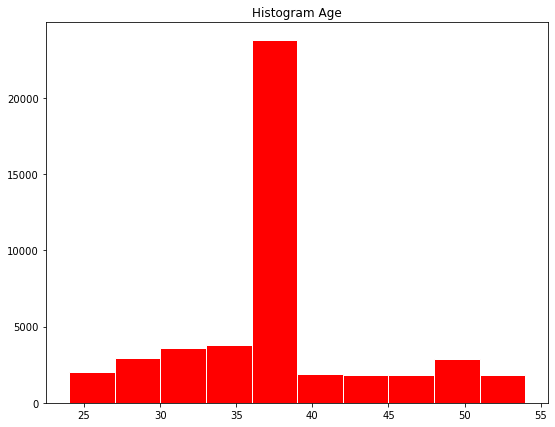

In [37]:
fig, ax=plt.subplots(figsize=(9,7))
ax.hist(i['Age'], color='r', edgecolor='w')
plt.title("Histogram Age")
plt.show()

In [38]:
age_tr =i['Age'].transform([np.sqrt, np.exp, np.log, np.reciprocal])
print(age_tr)

           sqrt           exp       log  reciprocal
1      5.656854  7.896296e+13  3.465736           0
2      6.403124  6.398435e+17  3.713572           0
4      5.656854  7.896296e+13  3.465736           0
6      6.633250  1.285160e+19  3.784190           0
7      6.855655  2.581313e+20  3.850148           0
...         ...           ...       ...         ...
50071  7.141428  1.409349e+22  3.931826           0
50072  5.196152  5.320482e+11  3.295837           0
50073  5.567764  2.904885e+13  3.433987           0
50074  6.324555  2.353853e+17  3.688879           0
50075  5.916080  1.586013e+15  3.555348           0

[46283 rows x 4 columns]


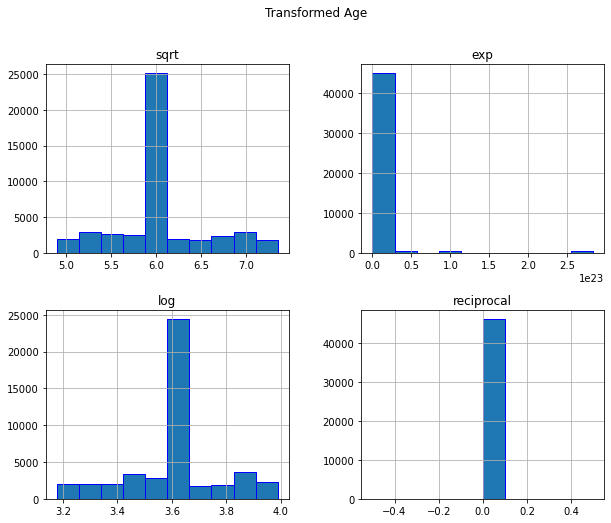

In [39]:
age_tr.hist(layout=(2,2),edgecolor='b',figsize=(10,8))
plt.suptitle('Transformed Age')
plt.show()

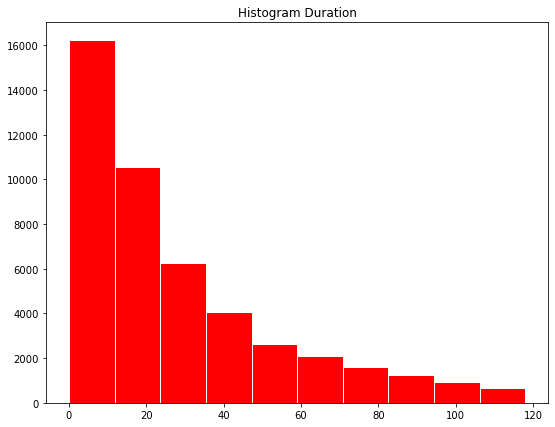

In [40]:
fig, ax=plt.subplots(figsize=(9,7))
ax.hist(i['Duration'], color='r', edgecolor='w')
plt.title("Histogram Duration")
plt.show()

In [41]:
duration_tr =i['Duration'].transform([np.sqrt,np.exp])
print(duration_tr)

            sqrt           exp
1       7.745967  1.142007e+26
2       8.888194  2.038281e+34
4       6.855655  2.581313e+20
6       7.549834  5.685720e+24
7       1.000000  2.718282e+00
...          ...           ...
50071   3.162278  2.202647e+04
50072   2.236068  1.484132e+02
50073  10.535654  1.609487e+48
50074   7.615773  1.545539e+25
50075   4.690416  3.584913e+09

[46283 rows x 2 columns]


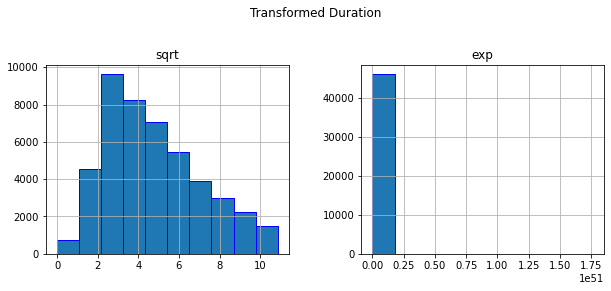

In [42]:
duration_tr.hist(layout=(2,2),edgecolor='b',figsize=(10,8))
plt.suptitle('Transformed Duration')
plt.show()

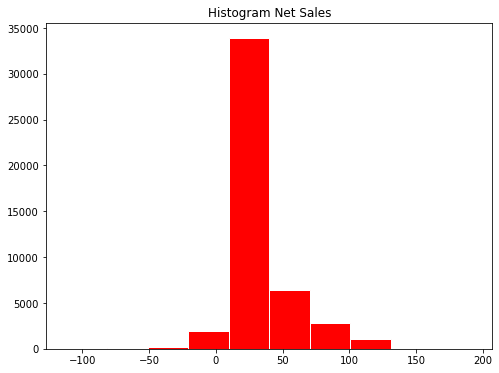

In [43]:
fig, ax=plt.subplots(figsize=(8,6))
ax.hist(i['Net Sales'], color='r', edgecolor='w')
plt.title("Histogram Net Sales")
plt.show()

           sqrt           exp
1           NaN  6.337800e-18
2           NaN  2.517499e-09
4           NaN  6.337800e-18
6           NaN  2.517499e-09
7           NaN  1.522998e-08
...         ...           ...
50071  5.916080  1.586013e+15
50072  4.242641  6.565997e+07
50073  5.916080  1.586013e+15
50074  6.324555  2.353853e+17
50075  5.099020  1.957296e+11

[46283 rows x 2 columns]


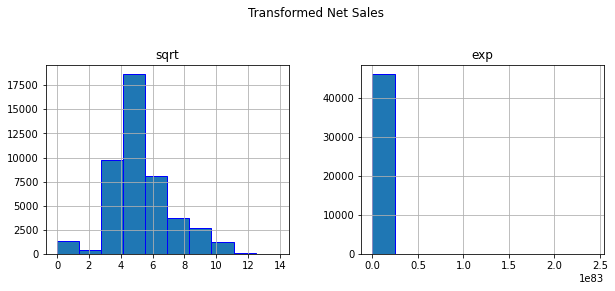

In [44]:
netSales_tr =i['Net Sales'].transform([np.sqrt, np.exp])
print(netSales_tr)
netSales_tr.hist(layout=(2,2),edgecolor='b',figsize=(10,8))

plt.suptitle('Transformed Net Sales')
plt.show()

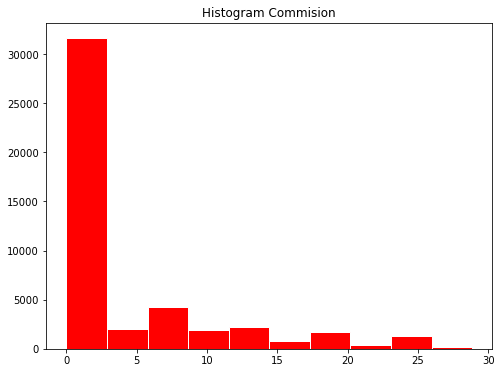

In [45]:
fig, ax=plt.subplots(figsize=(8,6))
ax.hist(i['Commision (in value)'], color='r', edgecolor='w')
plt.title("Histogram Commision")
plt.show()

           sqrt           exp
1      4.874423  2.083708e+10
2      3.446738  1.443506e+05
4      4.874423  2.083708e+10
6      3.446738  1.443506e+05
7      2.509980  5.445719e+02
...         ...           ...
50071  3.500000  2.089813e+05
50072  2.509980  5.445719e+02
50073  3.500000  2.089813e+05
50074  3.741657  1.202604e+06
50075  3.016621  8.955293e+03

[46283 rows x 2 columns]


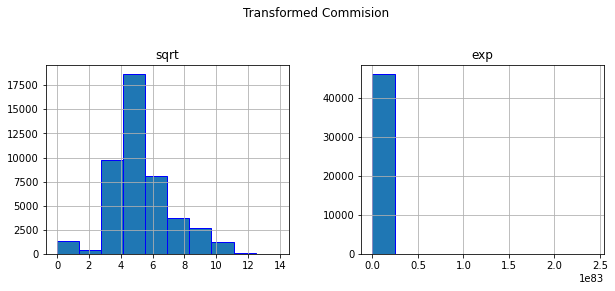

In [46]:
commision_tr =i['Commision (in value)'].transform([np.sqrt,np.exp])
print(commision_tr)
netSales_tr.hist(layout=(2,2),edgecolor='b',figsize=(10,8))

plt.suptitle('Transformed Commision')
plt.show()

In [53]:
#feature selection: filter method
# Load the dataset
j = pd.read_excel('abc5copy.xlsx')
 
# Create the dataframe
k = pd.DataFrame(j)

In [54]:
%matplotlib inline

<AxesSubplot:>

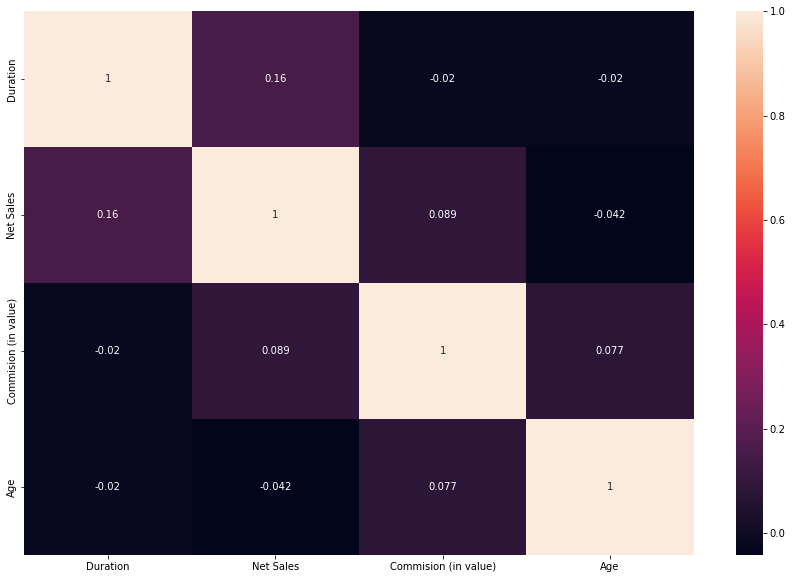

In [55]:
CorrMat = k.corr()
plt.figure(figsize= (15,10))
sns.heatmap(CorrMat, annot=True)

In [56]:
from sklearn.feature_selection import VarianceThreshold 
k.head()

,Duration,Net Sales,Commision (in value),Age
0,60,-39.6,23.76,32
1,79,-19.8,11.88,41
2,47,-39.6,23.76,32
3,57,-19.8,11.88,44
4,1,-18.0,6.30,47


In [61]:
VT= VarianceThreshold(threshold=1)
VT.fit(k)
VT.get_support()

array([ True,  True,  True,  True])

In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

X=k[['Duration', 'Age','Net Sales']]
y=k[['Commision (in value)']]



chi2_selector = SelectKBest(chi2, k=2)
kBest = chi2_selector.fit_transform(X,y)

chi2_scores = pd.DataFrame(list(zip(j.features_names, chi2_selector.scores_)),column=['features','score'])
chi2_scores

print('number of original features: ',X.shape[1])
print('number of reduced features: ',kBest.shape[1])

ValueError: Unknown label type: (array([[23.76],
       [11.88],
       [23.76],
       ...,
       [12.25],
       [14.  ],
       [ 9.1 ]]),)

In [74]:
from sklearn.feature_selection import mutual_info_classif
features = k[['Duration','Net Sales','Age']] #continuous
target = k[['Commision (in value)']] #categorical
features_scores = mutual_info_classif(features,target, random_state=0)
features_scores

ValueError: Unknown label type: 'continuous'